In [0]:
# we start by importing the needed libaries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot 
import sys
import os
from sklearn.utils import shuffle
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# matplotlib version 3.10 is need to be able to see the heatmap for confusion matrix

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.1.0


In [0]:
# we start by reading the data.
# our data has two categores Fake and True 
# Fake represent  fake news
# while True reprsent news which  is labeled true 
true_news_report = pd.read_csv('./data/True.csv')
fake_news_report = pd.read_csv('./data/Fake.csv')

In [0]:
def  understanding(data):
    assert len(data) == 2, " Please provide both Fake and True data"
    print("This will represent display the head of both Fake and True news")
    for item in data:
        print(item.head())
        print('\n\n\n')
    print("This will represent display the describition of  of both Fake and True news")
    for item in data:
        print(item.describe())
        print('\n\n\n')

In [0]:
understanding([true_news_report,fake_news_report])

This will represent display the head of both Fake and True news
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   




                              

In [0]:
# for better view, we shall return  10 rows for fake news

fake_news_report.head(n=10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [0]:
# displaaying the top 10 rows for the true news
true_news_report.head(n=10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [0]:
# let's describe our data to understand the stasttics such as count and frequent words
print('------------------------Fake News description---------------------')
fake_news_report.describe()

------------------------Fake News description---------------------


,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [0]:
print('------------------------True News description---------------------')
true_news_report.describe()

------------------------True News description---------------------


,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [0]:
# The next step is to process data 
# we shall start  by combining the all the data
# we shall also create another category named predict which is either 1 or 0. 
# 1 will be for the  true aand 0 will be for the fake news

def process(data):
    assert len(data) == 2, " Please provide both Fake and True data"
    # the first position will have fake news
    data[0] ['predict']= 0
    data[1]['predict'] = 1

    all_news = pd.concat([data[0],data[1]])
    # we shall comnbine the whole document by combinging the text and subject and title
    all_news['combined'] = all_news['text'] +all_news['title']+all_news['subject']
    all_news = shuffle(all_news).reset_index(drop=True)
    return all_news

In [0]:
combined_news = process([fake_news_report,true_news_report])

In [0]:
combined_news.head()

,title,text,subject,date,predict,combined
0,WHY THE HUGE 1.1 MILLION DROP in Food Stamp En...,OVER 1 MILLION PEOPLE HAVE DROPPED OFF OF THE ...,politics,"Aug 8, 2017",0,OVER 1 MILLION PEOPLE HAVE DROPPED OFF OF THE ...
1,House speaker urges Trump not to scrap 'Dreame...,WASHINGTON (Reuters) - House of Representative...,politicsNews,"September 1, 2017",1,WASHINGTON (Reuters) - House of Representative...
2,‘TAKE THE MONEY!’ How Clinton Campaign Sold Ou...,Aides to Hillary Clinton considered a ban on b...,politics,"Oct 17, 2016",0,Aides to Hillary Clinton considered a ban on b...
3,Brexit transition deal will require new UK leg...,LONDON (Reuters) - The British government is p...,worldnews,"October 26, 2017",1,LONDON (Reuters) - The British government is p...
4,U.S. Government Jailing People For Not Paying...,The enormous debt students incur for college i...,News,"February 16, 2016",0,The enormous debt students incur for college i...


In [0]:
# let's us split data  into test and training set

x_train, x_test,y_train,y_test =  train_test_split(combined_news['combined'], combined_news.predict, test_size=0.35)

In [0]:
print('X_TRAIN SIZE: ',len(x_train))
print('X_TEST SIZE: ',len(x_test))

X_TRAIN SIZE:  29183
X_TEST SIZE:  15715


In [0]:
data_plot = {}
confusion_matrix = {}

In [0]:
def metric_measures(model,MODEL_NAME,y_test=y_test, x_test= x_test):
    predict = model.predict(x_test)
    precision, recall, f1score, support = score(y_test, predict)
    accuracy = accuracy_score(y_true=y_test,y_pred=predict)
    print('fscore: {}'.format(f1score))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('support: {}'.format(support))
    print('Accuracy: {}'.format(  accuracy))
    cf_matrix = metrics.confusion_matrix(y_test,predict)

    fig, ax = plot.subplots(figsize=(8,6))
    ax.set_ylim(0 ,7)
    sns.heatmap(cf_matrix, annot=True, fmt='d',xticklabels=['TRUE','FAKE'], yticklabels=['TRUE','FAKE'])
    plot.ylabel('Actual')
    plot.xlabel('Predicted \n\n{}'.format(MODEL_NAME))
    plot.show()
 
    data = {'Accuracy': accuracy,'f1score': f1score[0], 'precision': precision[0], 'recall': recall[0],'support': support[0]/10000}
    data_plot[MODEL_NAME] =  data
 
     
    


fscore: [0.9966863  0.99643188]
precision: [0.9975433  0.99551096]
recall: [0.99583078 0.9973545 ]
support: [8155 7560]
Accuracy: 0.9965637925548839


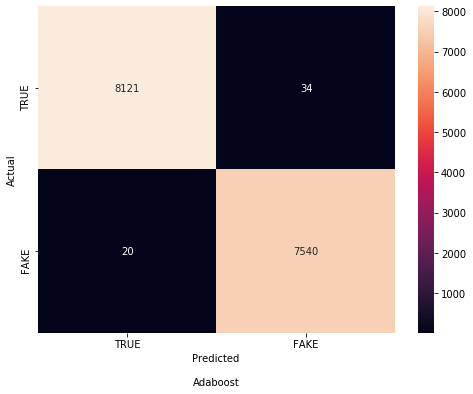

In [0]:
# USING ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
pipeline = Pipeline([('CountV', CountVectorizer()),
                 ('TfidfT', TfidfTransformer()),
                 ('clf', AdaBoostClassifier())])

model = pipeline.fit(x_train, y_train)
metric_measures(model,MODEL_NAME="Adaboost")

fscore: [0.99711851 0.99689133]
precision: [0.99705738 0.99695727]
recall: [0.99717964 0.9968254 ]
support: [8155 7560]
Accuracy: 0.9970092268533248


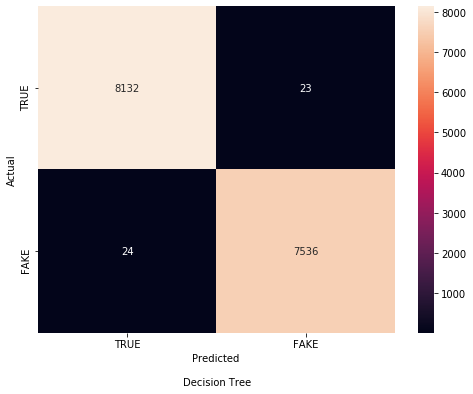

In [0]:
#USING DECISION TREE
pipeline = Pipeline([('CountV', CountVectorizer()),
                 ('TfidfT', TfidfTransformer()),
                 ('clf', tree.DecisionTreeClassifier())])
model = pipeline.fit(x_train, y_train)
metric_measures(model,MODEL_NAME="Decision Tree")  

fscore: [0.98877783 0.98789923]
precision: [0.98895976 0.98770329]
recall: [0.98859595 0.98809524]
support: [8155 7560]
Accuracy: 0.9883550747693287


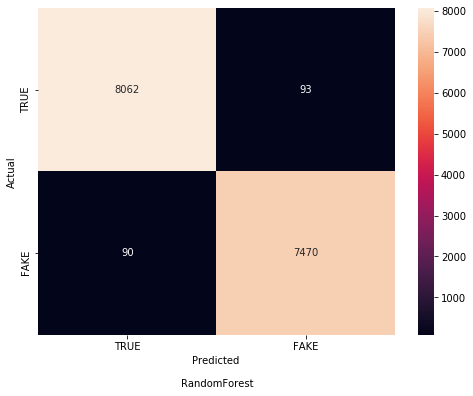

In [0]:
#USING Random Forest  
pipeline = Pipeline([('CountV', CountVectorizer()),
                 ('TfidfT', TfidfTransformer()),
                 ('clf', RandomForestClassifier())])
model = pipeline.fit(x_train, y_train)
metric_measures(model,MODEL_NAME="RandomForest")  

fscore: [0.90511668 0.898545  ]
precision: [0.90897848 0.89448158]
recall: [0.90128755 0.9026455 ]
support: [8155 7560]
Accuracy: 0.9019408208717785


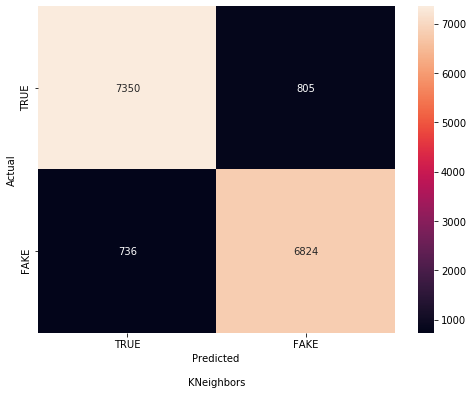

In [0]:
# USING Kneighbors
pipeline = Pipeline([('CountV', CountVectorizer()),
                 ('TfidfT', TfidfTransformer()),
                 ('clf', KNeighborsClassifier(n_neighbors = 30,weights = 'distance'))])#algorithm = 'brute'
model = pipeline.fit(x_train, y_train)
metric_measures(model,MODEL_NAME="KNeighbors")



fscore: [0.99004914 0.98930693]
precision: [0.99187692 0.98735178]
recall: [0.98822808 0.99126984]
support: [8155 7560]
Accuracy: 0.9896913776646517


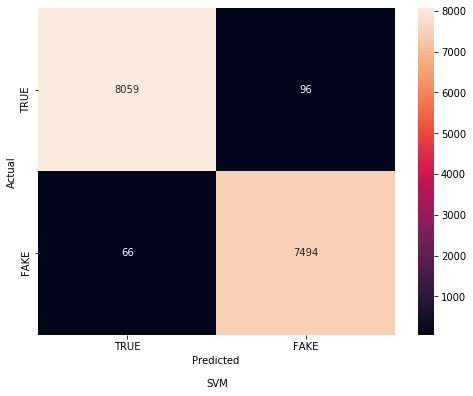

In [0]:
# USING Support vector machne
pipeline = Pipeline([('CountV', CountVectorizer()),
                 ('TfidfT', TfidfTransformer()),
                 ('clf', svm.SVC(gamma=0.001, C=100.))])#algorithm = 'brute'
model = pipeline.fit(x_train, y_train)
metric_measures(model,MODEL_NAME="SVM")

In [0]:
data_plot

{'Adaboost': {'Accuracy': 0.9965637925548839,
  'f1score': 0.9966863033873343,
  'precision': 0.9975432993489743,
  'recall': 0.9958307786633966,
  'support': 0.8155},
 'Decision Tree': {'Accuracy': 0.9970092268533248,
  'f1score': 0.9971185089816689,
  'precision': 0.9970573810691515,
  'recall': 0.9971796443899448,
  'support': 0.8155},
 'RandomForest': {'Accuracy': 0.9883550747693287,
  'f1score': 0.988777825473723,
  'precision': 0.9889597644749755,
  'recall': 0.9885959534028204,
  'support': 0.8155},
 'KNeighbors': {'Accuracy': 0.9019408208717785,
  'f1score': 0.9051166800073887,
  'precision': 0.9089784813257482,
  'recall': 0.9012875536480687,
  'support': 0.8155},
 'SVM': {'Accuracy': 0.9896913776646517,
  'f1score': 0.99004914004914,
  'precision': 0.9918769230769231,
  'recall': 0.9882280809319436,
  'support': 0.8155}}

In [0]:
 def plot_bar_chart(data_dict):
            df = pd.DataFrame(data_dict)
            df.plot(kind='bar')
            plot.show()       

In [0]:
pd.DataFrame(data_plot)

,Adaboost,Decision Tree,RandomForest,KNeighbors,SVM
Accuracy,0.996564,0.997009,0.988355,0.901941,0.989691
f1score,0.996686,0.997119,0.988778,0.905117,0.990049
precision,0.997543,0.997057,0.988960,0.908978,0.991877
recall,0.995831,0.997180,0.988596,0.901288,0.988228
support,0.815500,0.815500,0.815500,0.815500,0.815500


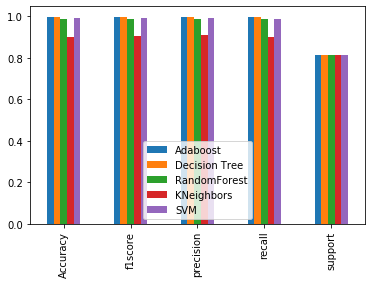

In [0]:
plot_bar_chart(data_plot)